In [95]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import keras.backend as Keras
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale= 1)

In [89]:
Keras.clear_session()  

In [91]:
#Creamos los generadores de imagenes de entrenamiento, validación y prueba

datagen = ImageDataGenerator(rescale= 1./ 255) # Reescalamos los pixeles con valores entre 0 y 1 

train_generator = datagen.flow_from_directory(
    directory= '../input/imagenes/train',
    target_size= (150, 150),
    color_mode= "rgb", # 3 canales 
    batch_size= 32,
    class_mode= "categorical" # one-hot encoded
)

valid_generator = datagen.flow_from_directory(
    directory='../input/imagenes/val',
    target_size= (150, 150),
    color_mode= "rgb",
    batch_size= 32,
    class_mode= "categorical"
)

test_generator = datagen.flow_from_directory(
    directory= '../input/imagenes/test',
    target_size= (150, 150),
    color_mode= "rgb",
    class_mode= "categorical",
    batch_size = 30,
    shuffle= False
)

# Parámetros 
STEP_SIZE_TRAIN= train_generator.n // train_generator.batch_size # Número de pasos que ejecutaremos para entrenar
STEP_SIZE_VALID= valid_generator.n // valid_generator.batch_size # Número de pasos que ejecutaremos para validar
STEP_SIZE_TEST= test_generator.n // test_generator.batch_size # Número de pasos que ejecutaremos para pruebas
NUM_CLASSES = train_generator.num_classes # Número de clases totales para la clasificación

Found 11224 images belonging to 6 classes.
Found 2810 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


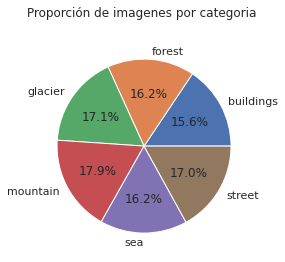

In [96]:
# Analizamos el porcentaje de imagenes de cada categoria

train_images_per_class = np.unique(train_generator.classes, return_counts= True) 

plt.pie(train_images_per_class[1],
        labels= train_generator.class_indices.keys(),
        autopct= '%1.1f%%')

plt.title('Proporción de imagenes por categoria \n')
plt.show()

In [35]:
# Creamos el modelo

model= Sequential()

# BLOQUE 1
model.add(Conv2D(32, (3, 3), input_shape= (150, 150, 3), activation= 'relu')) # 32 filtros con un tamaño de 3x3 y función de activación ReLu
model.add(MaxPooling2D((2, 2))) # Tamaño de la ventana de agrupación -> 2x2

# BLOQUE 2
model.add(Conv2D(64, (3, 3), activation= 'relu')) # 64 filtros con un tamaño de 3x3 y función de activación ReLu
model.add(MaxPooling2D((2, 2))) # Tamaño de la ventana de agrupación -> 2x2

# BLOQUE 3
model.add(Conv2D(64, (3, 3), activation= 'relu')) # 64 filtros con un tamaño de 3x3 y función de activación ReLu
model.add(MaxPooling2D((2, 2))) # Tamaño de la ventana de agrupación -> 2x2

# BLOQUE 4
model.add(Conv2D(128, (3, 3), activation= 'relu')) # 128 filtros con un tamaño de 3x3 y función de activación ReLu
model.add(MaxPooling2D((2, 2))) # Tamaño de la ventana de agrupación -> 2x2

# BLOQUE 5
model.add(Flatten()) # Convertimos los elementos de la matriz de imagenes en un array de una sola dimensión

#BLOQUE 6
model.add(Dense(256, activation= 'relu')) # Fully connected
model.add(Dense(128, activation= 'relu')) # Fully connected
model.add(Dense(NUM_CLASSES, activation= 'softmax')) # Fully connected -> número de neuronas = número de clases

model.compile(optimizer= 'adam',
              loss= 'categorical_crossentropy',
              metrics= 'accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [36]:
# Entrenamiento del modelo

Model = model.fit(train_generator,
        steps_per_epoch= STEP_SIZE_TRAIN,
        validation_data= valid_generator,
        validation_steps= STEP_SIZE_VALID,
        epochs= 20
)

Epoch 1/20
350/350 [==============================] - 20s 57ms/step - loss: 1.0454 - accuracy: 0.5773 - val_loss: 0.8384 - val_accuracy: 0.6577
Epoch 2/20
350/350 [==============================] - 21s 59ms/step - loss: 0.7533 - accuracy: 0.7156 - val_loss: 0.7131 - val_accuracy: 0.7349
Epoch 3/20
350/350 [==============================] - 20s 59ms/step - loss: 0.6081 - accuracy: 0.7767 - val_loss: 0.5532 - val_accuracy: 0.8010
Epoch 4/20
350/350 [==============================] - 19s 55ms/step - loss: 0.5250 - accuracy: 0.8081 - val_loss: 0.5818 - val_accuracy: 0.7992
Epoch 5/20
350/350 [==============================] - 20s 58ms/step - loss: 0.4391 - accuracy: 0.8407 - val_loss: 0.5095 - val_accuracy: 0.8182
Epoch 6/20
350/350 [==============================] - 20s 57ms/step - loss: 0.3626 - accuracy: 0.8674 - val_loss: 0.5363 - val_accuracy: 0.8190
Epoch 7/20
350/350 [==============================] - 20s 56ms/step - loss: 0.2938 - accuracy: 0.8931 - val_loss: 0.5484 - val_accuracy:

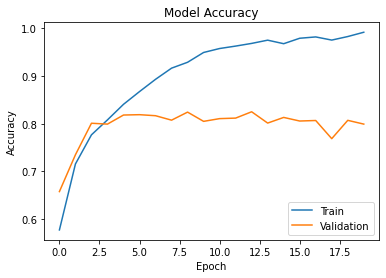

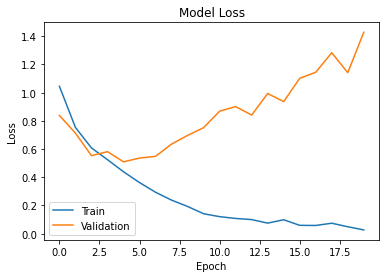

In [38]:
# Creamos dos gráficas y comparamos la exactitud y la pérdida con respecto a los datos de entrenamiento y validación

# Gráfica accuracy

plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Gráfica loss

plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')
plt.show()

In [97]:
# Guardamos el modelo entrenado

model.save('/kaggle/working/ModeloI(B).h5')

In [98]:
# Cargamos el modelo

modelLoad = keras.models.load_model('/kaggle/working/ModeloI(B).h5')

In [99]:
# Evaluamos el modelo con los datos de prueba

results = modelLoad.evaluate(test_generator, steps= STEP_SIZE_TEST)
print("Loss: {} Accuracy: {}".format(results[0], results[1] * 100))

100/100 [==============================] - 4s 41ms/step - loss: 1.3948 - accuracy: 0.7870
Loss: 1.3948101997375488 Accuracy: 78.70000004768372


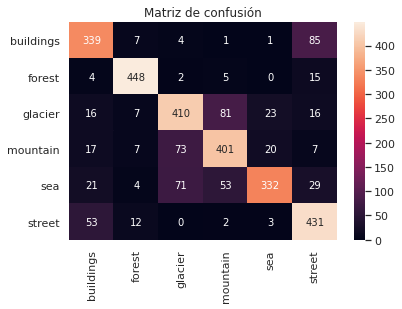

In [101]:
# Analizamos las predicciones de los datos de pruebas

predictions = modelLoad.predict(test_generator) # Vector de probabilidades
pred_labels = np.argmax(predictions, axis = 1) # Obtenemos la predicción con mas probabilidad
class_names = test_generator.class_indices.keys() # Nombre de las etiquetas

CM = confusion_matrix(test_generator.classes, pred_labels) # Matriz de confusión

ax = plt.axes()
sn.heatmap(CM, annot= True, 
           annot_kws={"size": 10}, 
           xticklabels= class_names, 
           yticklabels= class_names, 
           ax = ax,
           fmt= "d")
ax.set_title('Matriz de confusión')
plt.show()

In [100]:
# Función para obtener la etiqueta

def getcode(n) : 
    for x , y in train_generator.class_indices.items() : 
        if n == y : 
            return x 

In [102]:
# Usamos el modelo para predecir una imagen en concreto

img = image.load_img('../input/imagenes/test/buildings/20057.jpg', target_size = (150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

predict = modelLoad.predict(img)
print('Predicción de la imagen: ' + getcode(np.argmax(predict)))

Predicción de la imagen: buildings
